In [67]:
%matplotlib inline
from IPython import display
import os
import io
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import importlib

import rtmtools.lblrtm.aerutils as aerutils
import rtmtools.lblrtm.aeranalyse as aeranalyse
import rtmtools.lblrtm.visualisation as viz

import rtmtools.clirad.sw.wrangle as cliradwrangle
import rtmtools.clirad.sw.analyse as cliradanalyse
import rtmtools.clirad.lw.info

import rtmtools.rrtmg.lw.wrangle as rrtmgwrangle
import rtmtools.rrtmg.sw.analyse as rrtmganalyse



importlib.reload(aerutils)
importlib.reload(aeranalyse)
importlib.reload(viz)

importlib.reload(cliradwrangle)
importlib.reload(cliradanalyse)
importlib.reload(rtmtools.clirad.lw.info)

importlib.reload(rrtmgwrangle)
importlib.reload(rrtmganalyse)

<module 'rtmtools.rrtmg.sw.analyse' from '/nuwa_cluster/home/jackyu/radiation/rtmtools/rtmtools/rrtmg/sw/analyse.py'>

In [2]:
name_molecule = r'$N_{2}O$'

#### Load CRD results

In [3]:
# Get lbl line-by-line results
pathout_crd = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H2012_N2O_cut25/OUTPUT_RADSUM'
pnl_crd = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd, cooling_rate = True, signed_fluxes = True)


In [13]:
# H1996 cutoff = 10 cm-1
pathout_crd1 = '/nuwa_cluster/home/jackyu/radiation/crd/LW/examples/lbl_H1996_CO2_cut10/OUTPUT_RADSUM'
pnl_crd1 = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_crd1, cooling_rate = True, signed_fluxes = True)


#### Load CLIRAD results

In [15]:
# Read OUTPUT_CLIRAD.dat
pathout_clirad = '/nuwa_cluster/home/jackyu/radiation/clirad/LW/examples/mls75_N2O_H2012/OUTPUT_CLIRAD.dat'
pnl_clirad = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom = pathout_clirad, cooling_rate = True, signed_fluxes= True)


In [11]:
pathout_clirad_96 = '/nuwa_cluster/home/jackyu/radiation/clirad/LW/examples/mls75_H2O_O3/OUTPUT_CLIRAD.dat'
pnl_clirad_96 = cliradwrangle.OUTPUT_CLIRAD_to_PandasPanel(readfrom = pathout_clirad_96, cooling_rate = True, signed_fluxes= True)

In [15]:
# prepare results Hitran 2012 updated version
def path_cliradlw_h2012():
    return '../clirad/LW/examples/mls75_CO2_H2012/CLIRAD_IR_output.dat'


def get_rateT(df, ratename = 'cooling rates'):
    return pd.DataFrame({'pressure': .5 * (df['p'].values[1:] + df['p'].values[: -1]),
                    ratename: df[ratename].values[1:]})


df = cliradwrangle.output_txtfile_to_DataFrame(path_cliradlw_h2012())

rateT_clirad2012 = get_rateT(df, ratename = 'cooling rates')

#### Load LBLRTM results

In [23]:
# Get AER line-by-line results
pathout_lblrtm = '/nuwa_cluster/home/jackyu/line_by_line/aerlbl_v12.2_package/runs/LW/run_mls70pro_N2O/OUTPUT_RADSUM'
pnl_lblrtm = aerutils.OUTPUT_RADSUM_to_pandasPanel(readfrom = pathout_lblrtm, signed_fluxes = True, cooling_rate = True)



#### Load RRTMG results

In [19]:
pathout_rrtmg = '/nuwa_cluster/home/jackyu/radiation/rrtmg/LW/examples/mls70_N2O/OUTPUT_RRTM'
pnl_rrtmg = rrtmgwrangle.OUTPUT_RRTM_to_pandasPanel(readfrom = pathout_rrtmg, signed_fluxes = True, cooling_rate = True)



# Total cooling rates

In [76]:
def plot_total_cooling_rates(infos_wavenumber = None, infos_spectralband = None):
    
    levels_atm = [70, 30, 0]
    
    names, colours, linestyles, dfs = [], [], [], []
    
    if infos_wavenumber:
        names_wavenumber, colours_wavenumber, linestyles_wavenumber, pnls_wavenumber = \
        map(list, zip(*infos_wavenumber))
        dfs_wavenumber = [aeranalyse.sum_OUTPUT_RADSUM_over_wbands(pnl, V1 = 0, V2 = 3000) \
                          for pnl in pnls_wavenumber]        
        
        names.extend(names_wavenumber)
        colours.extend(colours_wavenumber)
        linestyles.extend(linestyles_wavenumber)
        dfs.extend(dfs_wavenumber)
        
        
    if infos_spectralband:
        names_spectralband, colours_spectralband, linestyles_spectralband, pnls_spectralband = \
        map(list, zip(*infos_spectralband))
        dfs_spectralband = [cliradanalyse.sum_OUTPUT_CLIRAD_over_wbands(pnl, wbands = range(1, 11))\
                            for pnl in pnls_spectralband]
        
        names.extend(names_spectralband)
        colours.extend(colours_spectralband)
        linestyles.extend(linestyles_spectralband)
        dfs.extend(dfs_spectralband)
        
    
    if infos_wavenumber or infos_spectralband:
        dfs_atm = [df.loc[levels_atm, :] for df in dfs]
        viz.tabulate_difference(dfs = dfs_atm, 
                                names = names,
                                title = 'Total cooling rate. {}'.format(name_molecule))         
 
        max_cr = max([df['cooling_rate'].max() for df in dfs])

        viz.plot_pres_vs_hrcr(dfs = dfs,
                              names = names,
                              linestyles = linestyles, 
                              colours = colours,
                              title = 'Total cooling rate. {}'.format(name_molecule),
                              cooling_rate = True,
                              xlim_linear = None, 
                              xlim_log = None,
                              ylim = (1e-3, 1e3))
    
        display.display(plt.gcf()); plt.close()
    


Total cooling rate. $N_{2}O$

CRD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -423.658037   0.000000 -423.658037      0.000000
30   299.800000 -423.659956   0.000597 -423.659359     -0.000029
0   1013.000000 -423.662018   0.004622 -423.657396      0.000071

RRTMG
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -423.4809     0.0000 -423.4809       0.00000
30   299.70000 -423.5025     0.0007 -423.5018      -0.00111
0   1013.00000 -423.5988     0.1154 -423.4834       0.00316

LBLRTM
     pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.0024 -423.440717   0.000000 -423.440717      0.000000
30   299.8000 -423.445756   0.001103 -423.444653     -0.000088
0   1013.0000 -423.532488   0.010608 -423.521880     -0.028787

CLIRAD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -423.779854   0.000013 -423.779841      0.000000
30   299.800000 -423.781944   0.000364 -423.781580     -0.00

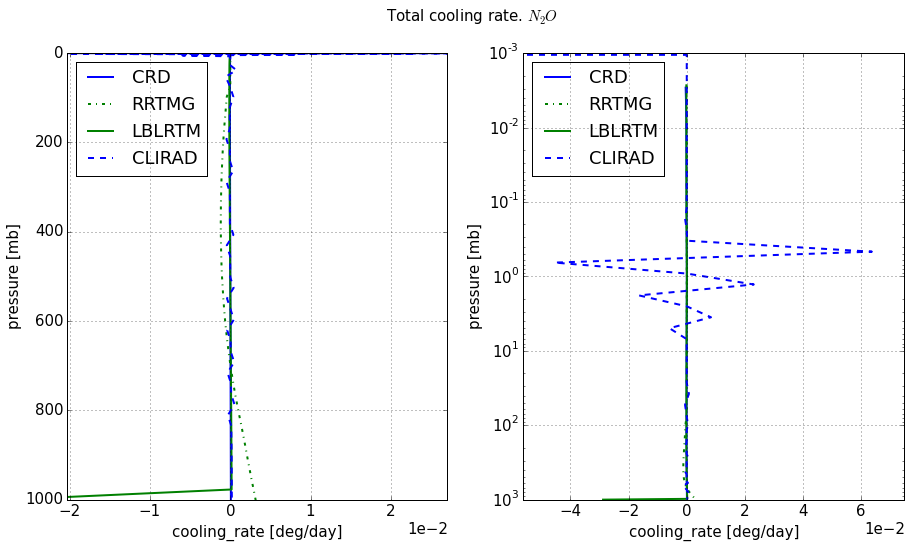

In [77]:
plot_total_cooling_rates(infos_wavenumber = [('CRD', 'b', '-', pnl_crd),
                                            ('RRTMG', 'g', '-.', pnl_rrtmg),
                                            ('LBLRTM', 'g', '-', pnl_lblrtm)],\
                        infos_spectralband = [('CLIRAD', 'b', '--', pnl_clirad)])

# In CLIRAD's wavenumber bands

In [68]:
def fluxtableNhrplot_by_clirad_bands(pnl_clirad, *infos_lbl):    
    global name_molecule, xlim_linear
    clirad_wbands = rtmtools.clirad.lw.info.wavenumber_bands()
    wbands = list(range(1, 10 + 1))
    wranges = {wband: clirad_wbands[wband] for wband in wbands}
    
    atm_levels = [70, 30, 0]
    
    names, colours, linestyles, pnls_lbl = map(list, zip(*infos_lbl))
           
    pnls = [rtmtools.clirad.sw.analyse.lines2bands(pnl_lbl, wbands = wranges)\
            for pnl_lbl in pnls_lbl]

    names.append('CLIRAD')
    colours.append('b')
    linestyles.append('--')
    pnls.append(pnl_clirad)
    
    for wband in wbands:
        print('---------------------------------------------------------------------------')
        print() 
        dfs = [pnl[wband].loc[atm_levels, :] for pnl in pnls]
        
        wlabel = ' '.join(['{} ~ {}'.format(*interval) for interval in wranges[wband]]) + ' cm-1'
        
        viz.tabulate_difference(dfs = dfs, 
                                names = names,
                                title = 'Wavenumber band: {}, {}'.format(wband, wlabel))
        
        dfs = [pnl[wband] for pnl in pnls]
        
        max_cr = max([df['cooling_rate'].max() for df in dfs])
        
        viz.plot_pres_vs_hrcr(dfs = dfs,
                              names = names,
                              linestyles = linestyles, 
                              colours = colours,
                              title = 'Cooling rate {} {}'.format(name_molecule, wlabel),
                              cooling_rate = True,\
                              xlim_linear = None,
                              xlim_log = None,
                             ylim = (1e-3, 1e3))
    
        display.display(plt.gcf()); plt.close()    


Flux tables and cooling rates in CLIRAD spectral bands


---------------------------------------------------------------------------


Wavenumber band: 1, 0 ~ 340 cm-1

CRD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -51.09304  0.000000e+00 -51.093040  0.000000e+00
30   299.800000 -51.09304  2.655836e-07 -51.093040  1.255140e-09
0   1013.000000 -51.09304  5.329452e-07 -51.093039  3.593164e-09

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -51.180269  0.000000e+00 -51.180269  0.000000e+00
30   299.8000 -51.180269  6.623381e-08 -51.180269  1.522742e-09
0   1013.0000 -51.100657  2.952978e-07 -51.100657  2.825879e-02

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -54.5825          0  -54.5825             0
30   299.70000 -54.5825          0  -54.5825             0
0   1013.00000 -54.5825          0  -54.5825             0

CLIRAD
       pressure   flux_up  flux_down   net_flux  coo

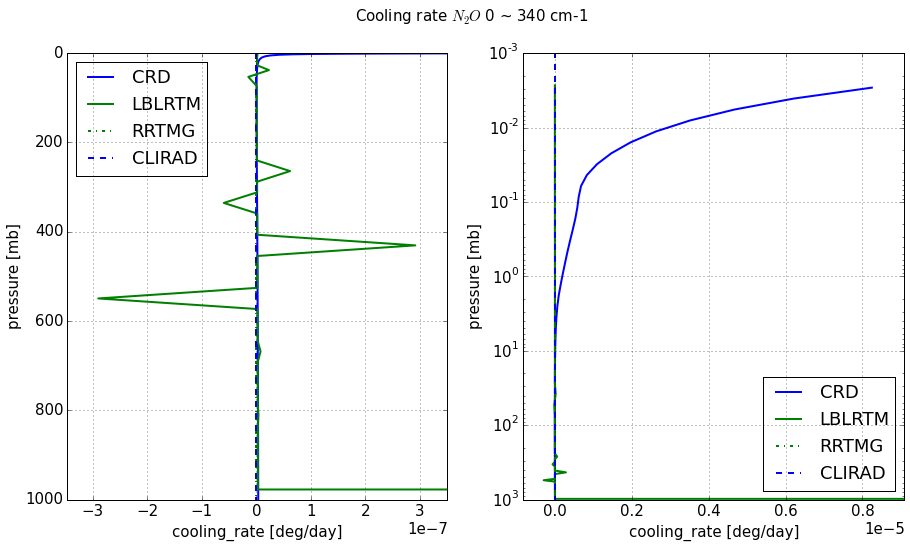

---------------------------------------------------------------------------


Wavenumber band: 2, 340 ~ 540 cm-1

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -82.315834  0.000000e+00 -82.315834  0.000000e+00
30   299.800000 -82.315835  3.514494e-07 -82.315834  6.818576e-10
0   1013.000000 -82.315835  7.585482e-07 -82.315834  5.776692e-09

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -82.326887  0.000000e+00 -82.326887  0.000000e+00
30   299.8000 -82.326887  1.467310e-08 -82.326887  2.038726e-11
0   1013.0000 -82.315849  3.571405e-07 -82.315848  3.918547e-03

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -60.9174          0  -60.9174             0
30   299.70000 -60.9174          0  -60.9174             0
0   1013.00000 -60.9174          0  -60.9174             0

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -82.31578   0.000004 -82.

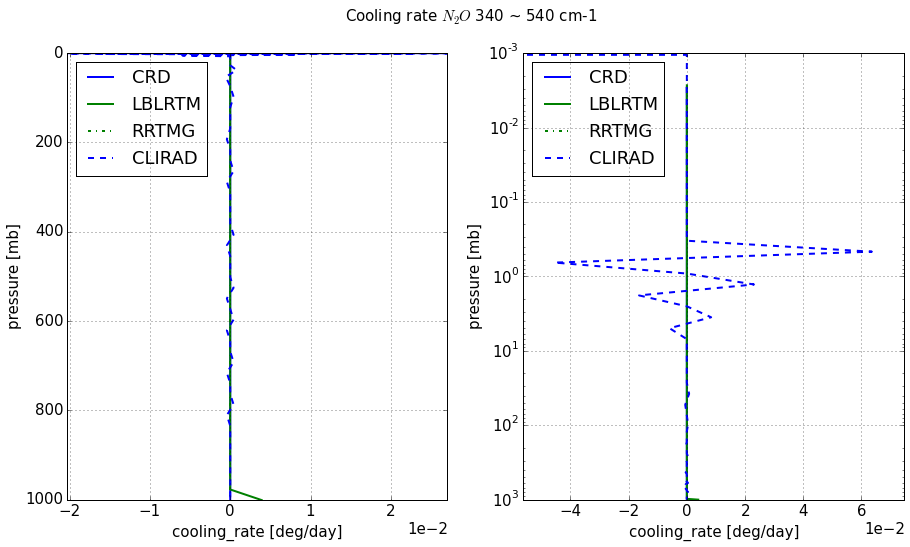

---------------------------------------------------------------------------


Wavenumber band: 3, 540 ~ 800 cm-1

CRD
       pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -112.836261   0.000000 -112.836261      0.000000
30   299.800000 -112.837118   0.000552 -112.836567     -0.000002
0   1013.000000 -112.837813   0.003197 -112.834616      0.000039

LBLRTM
     pressure     flux_up  flux_down    net_flux  cooling_rate
70     0.0024 -112.778940   0.000000 -112.778940      0.000000
30   299.8000 -112.779755   0.000522 -112.779233     -0.000002
0   1013.0000 -112.816764   0.003012 -112.813751     -0.012867

RRTMG
      pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -138.4293     0.0000 -138.4293             0
30   299.70000 -138.4293     0.0000 -138.4293             0
0   1013.00000 -138.4293     0.0001 -138.4292             0

CLIRAD
       pressure  flux_up  flux_down    net_flux  cooling_rate
70     0.002417 -112.816   0.000006 -112.8159

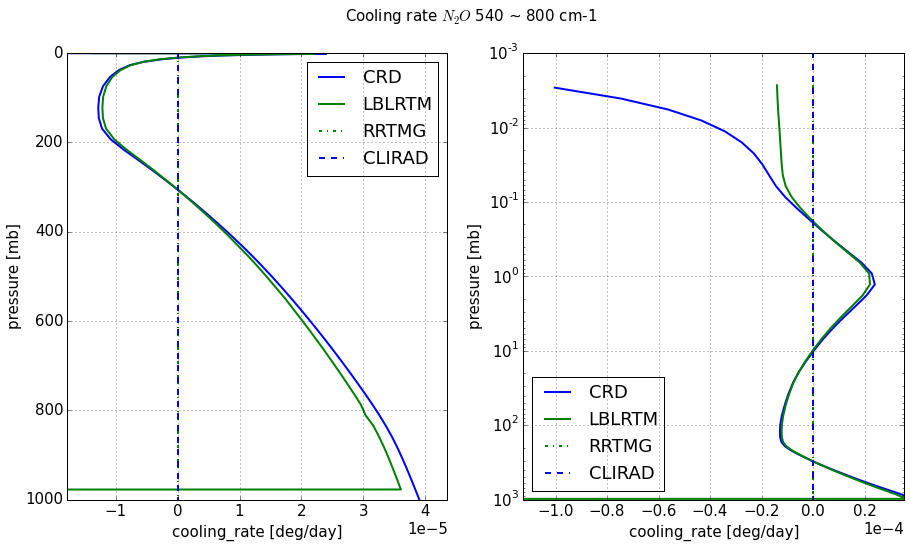

---------------------------------------------------------------------------


Wavenumber band: 4, 800 ~ 980 cm-1

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -61.681241  0.000000e+00 -61.681241  0.000000e+00
30   299.800000 -61.681242  2.277396e-07 -61.681242 -4.943739e-09
0   1013.000000 -61.681243  2.472326e-06 -61.681240  4.980984e-08

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -61.631458  0.000000e+00 -61.631458  0.000000e+00
30   299.8000 -61.631458  6.046083e-08 -61.631458 -3.393722e-09
0   1013.0000 -61.657526  1.921062e-06 -61.657524 -9.252643e-03

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -53.9607          0  -53.9607             0
30   299.70000 -53.9607          0  -53.9607             0
0   1013.00000 -53.9607          0  -53.9607             0

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -61.64932 -9.685755e-0

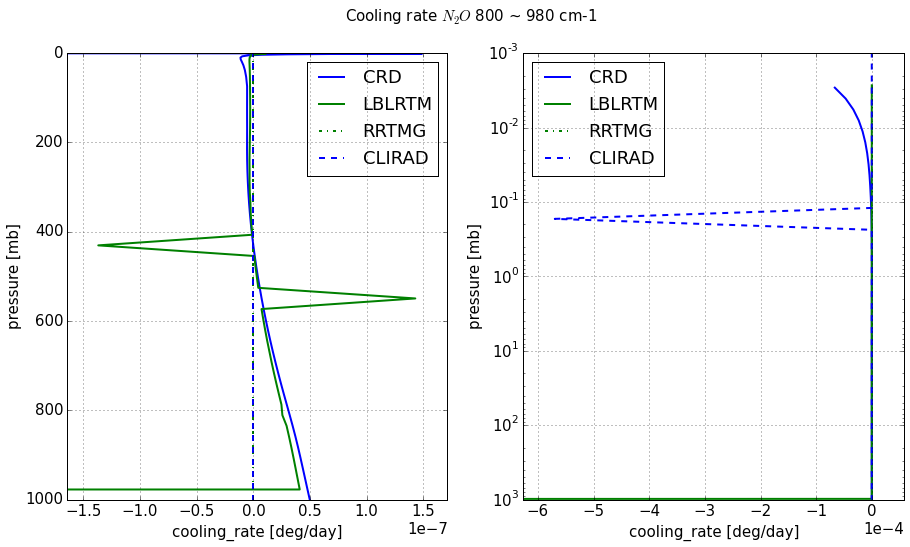

---------------------------------------------------------------------------


Wavenumber band: 5, 980 ~ 1100 cm-1

CRD
       pressure    flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -31.354230  0.000000e+00 -31.35423  0.000000e+00
30   299.800000 -31.354231  7.899267e-08 -31.35423 -1.595474e-09
0   1013.000000 -31.354231  4.761134e-07 -31.35423  8.415357e-09

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -31.324714  0.000000e+00 -31.324714  0.000000e+00
30   299.8000 -31.324714  7.807703e-09 -31.324714 -6.221479e-10
0   1013.0000 -31.337711  2.595273e-07 -31.337710 -4.613236e-03

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -26.6400     0.0000    -26.64             0
30   299.70000 -26.6400     0.0000    -26.64             0
0   1013.00000 -26.6401     0.0001    -26.64             0

CLIRAD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -31.34392          0 -31.3439

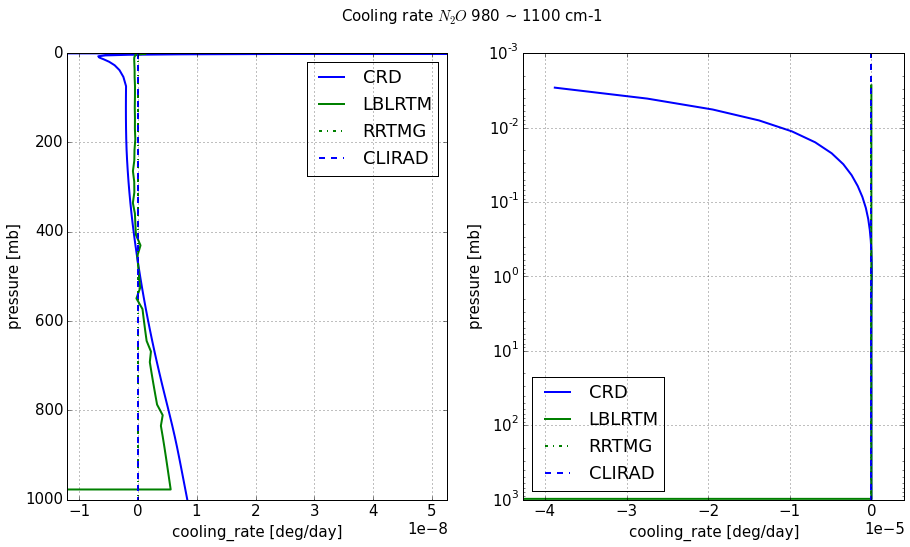

---------------------------------------------------------------------------


Wavenumber band: 6, 1100 ~ 1215 cm-1

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -23.269652  0.000000e+00 -23.269652  0.000000e+00
30   299.800000 -23.269652  4.643548e-08 -23.269652 -8.180951e-10
0   1013.000000 -23.269652  1.389566e-07 -23.269652  1.618239e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -23.245320   0.000000 -23.245320      0.000000
30   299.8000 -23.245459   0.000029 -23.245430     -0.000002
0   1013.0000 -23.254791   0.000300 -23.254491     -0.003259

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -21.5225          0  -21.5225             0
30   299.70000 -21.5225          0  -21.5225             0
0   1013.00000 -21.5225          0  -21.5225             0

CLIRAD
       pressure   flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -23.27302   0.000000 -23.273020    

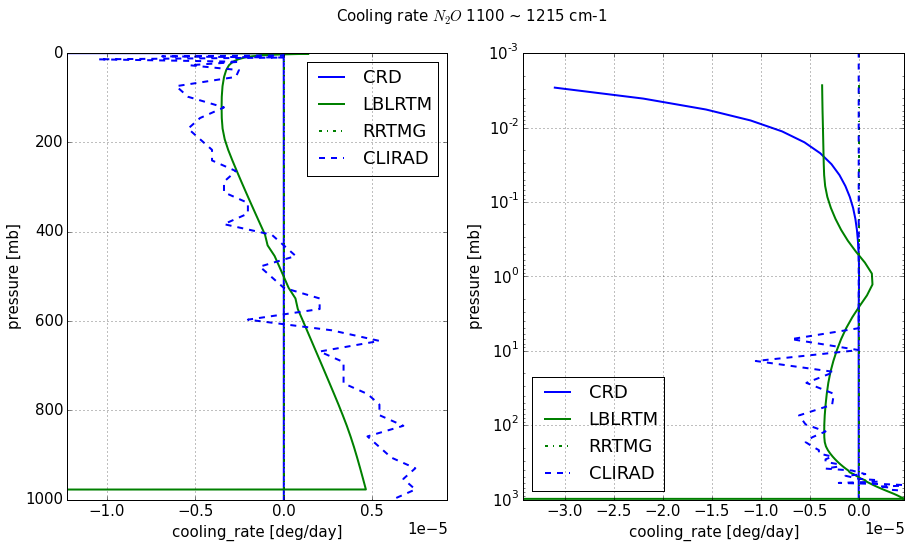

---------------------------------------------------------------------------


Wavenumber band: 7, 1215 ~ 1380 cm-1

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -23.755165  0.000000e+00 -23.755165  0.000000e+00
30   299.800000 -23.755165  4.129745e-08 -23.755165 -9.604811e-10
0   1013.000000 -23.755165  1.320426e-07 -23.755165  1.648939e-09

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -23.721730   0.000000 -23.721730      0.000000
30   299.8000 -23.724770   0.000510 -23.724260     -0.000057
0   1013.0000 -23.736876   0.005918 -23.730959     -0.003121

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -31.2994          0  -31.2994             0
30   299.70000 -31.2994          0  -31.2994             0
0   1013.00000 -31.2994          0  -31.2994             0

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -23.73470  1.229346e-07 -23.7347

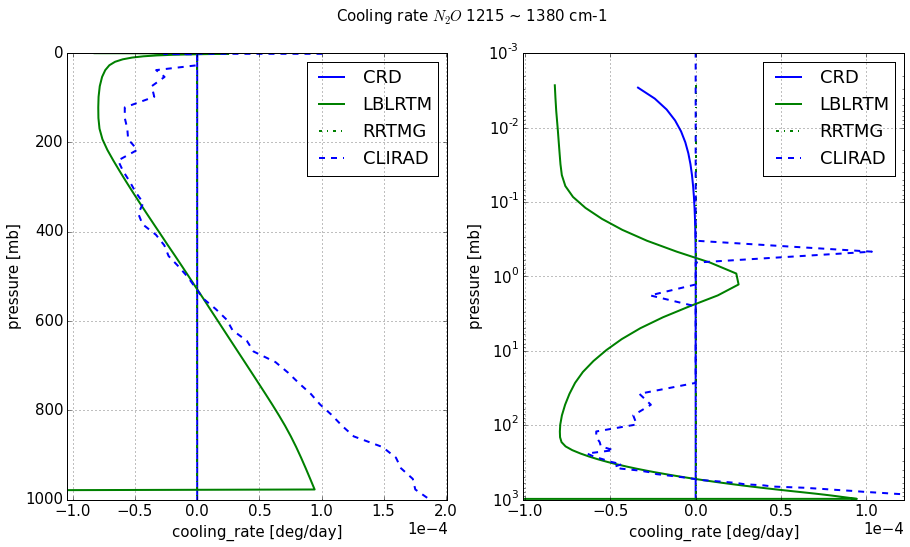

---------------------------------------------------------------------------


Wavenumber band: 8, 1380 ~ 1900 cm-1

CRD
       pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.729591  0.000000e+00 -30.729591  0.000000e+00
30   299.800000 -30.729593  1.719423e-07 -30.729593 -4.523010e-08
0   1013.000000 -30.729595  3.162348e-06 -30.729592  6.394770e-08

LBLRTM
     pressure    flux_up     flux_down   net_flux  cooling_rate
70     0.0024 -30.682716  0.000000e+00 -30.682716  0.000000e+00
30   299.8000 -30.682718  1.226902e-07 -30.682718 -4.146890e-08
0   1013.0000 -30.697533  2.835925e-06 -30.697530 -5.257823e-03

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -26.7814          0  -26.7814             0
30   299.70000 -26.7814          0  -26.7814             0
0   1013.00000 -26.7814          0  -26.7814             0

CLIRAD
       pressure   flux_up     flux_down   net_flux  cooling_rate
70     0.002417 -30.88047  2.421439e

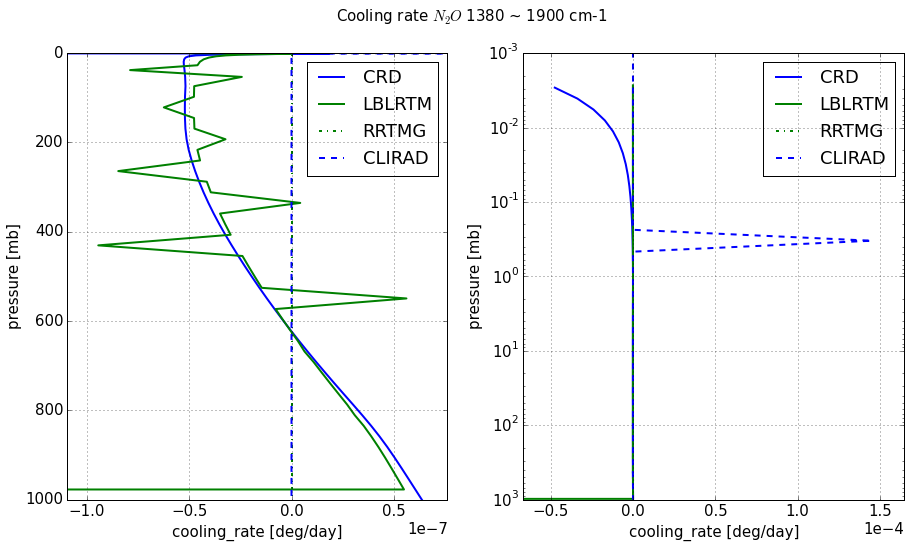

---------------------------------------------------------------------------


Wavenumber band: 9, 1900 ~ 3000 cm-1

CRD
       pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.002417 -6.623022   0.000000 -6.623022      0.000000
30   299.800000 -6.624081   0.000044 -6.624037     -0.000028
0   1013.000000 -6.625445   0.001418 -6.624027      0.000031

LBLRTM
     pressure   flux_up  flux_down  net_flux  cooling_rate
70     0.0024 -6.548684   0.000000 -6.548684      0.000000
30   299.8000 -6.549726   0.000042 -6.549684     -0.000027
0   1013.0000 -6.614782   0.001372 -6.613410     -0.022593

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242  -9.3477     0.0000   -9.3477       0.00000
30   299.70000  -9.3693     0.0007   -9.3686      -0.00111
0   1013.00000  -9.4655     0.1152   -9.3503       0.00316

CLIRAD
       pressure   flux_up     flux_down  net_flux  cooling_rate
70     0.002417 -6.674494 -1.536682e-08 -6.674494            -0
30   299.8000

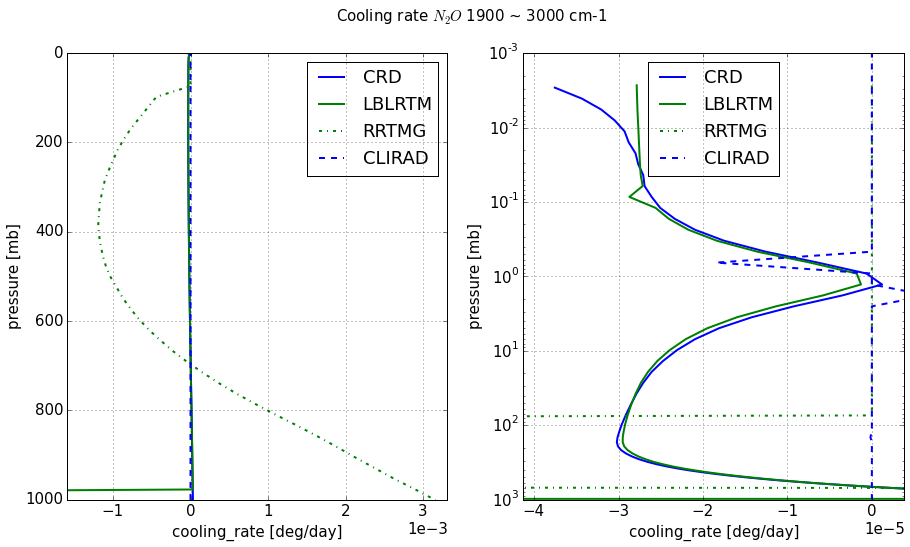

---------------------------------------------------------------------------


Wavenumber band: 10, 540 ~ 620 cm-1

CRD
       pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.002417 -36.233889   0.000000 -36.233889      0.000000
30   299.800000 -36.234737   0.000546 -36.234191     -0.000002
0   1013.000000 -36.235420   0.003138 -36.232282      0.000038

LBLRTM
     pressure    flux_up  flux_down   net_flux  cooling_rate
70     0.0024 -36.223167   0.000000 -36.223167      0.000000
30   299.8000 -36.223974   0.000517 -36.223457     -0.000002
0   1013.0000 -36.231410   0.002960 -36.228450     -0.002375

RRTMG
      pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.00242 -58.6466          0  -58.6466             0
30   299.70000 -58.6466          0  -58.6466             0
0   1013.00000 -58.6466          0  -58.6466             0

CLIRAD
       pressure  flux_up  flux_down  net_flux  cooling_rate
70     0.002417       -0          0         0            -0
30   2

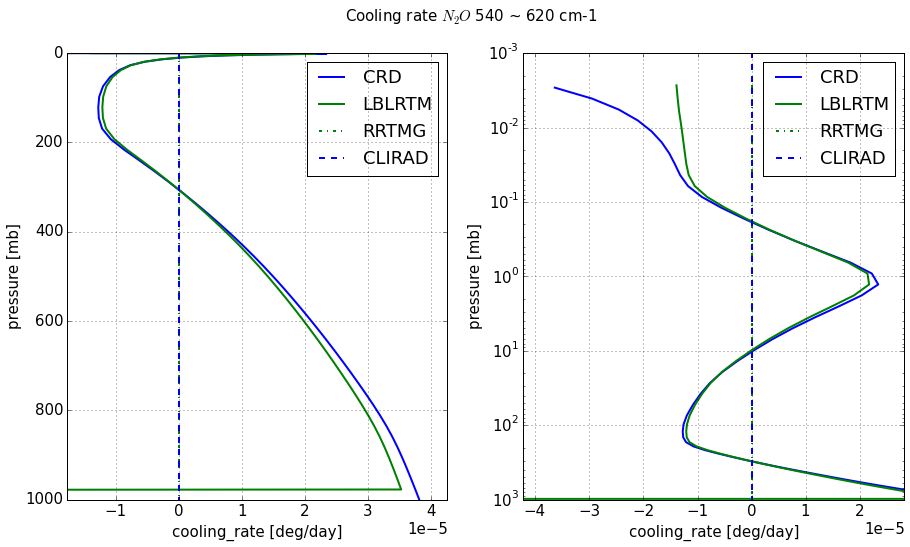

In [70]:
print('Flux tables and cooling rates in CLIRAD spectral bands')
print()
print()

fluxtableNhrplot_by_clirad_bands(pnl_clirad, \
                                ('CRD', 'b', '-', pnl_crd), \
                                ('LBLRTM', 'g', '-', pnl_lblrtm),
                                ('RRTMG', 'g', '-.', pnl_rrtmg))

In [78]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')